<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Parcial%203/11.3.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

In [128]:
# A)
l = 0.1
R_s = 1
N = 1000

def simular_caminata():
  x, y, z  = 0, 0, 0
  pasos = 0

  while x**2 + y**2 + z**2 < R_s**2:
    theta = np.arccos(1 - 2*np.random.rand())
    phi = 2*np.pi*np.random.rand()
    # Se generan ángulos aleatorios para: θ ∈ [0, π] y ϕ ∈ [0, 2π]

    x += l*np.sin(theta)*np.cos(phi)
    y += l*np.sin(theta)*np.sin(phi)
    z += l*np.cos(theta)
    pasos += 1
  return pasos

fotones_pasos = np.zeros(N)
for i in range(N):
  fotones_pasos[i] = simular_caminata()

promedio_pasos = np.mean(fotones_pasos)
print(f'El número promedio de pasos para que el fotón salga partiendo desde el centro del sol es: {int(promedio_pasos)}')
print(f'Valor no discretizado: {promedio_pasos}')

El número promedio de pasos para que el fotón salga partiendo desde el centro del sol es: 104
Valor no discretizado: 104.577


In [129]:
# B)
n_clases = 20
min_pasos = int(np.min(fotones_pasos))
max_pasos = int(np.max(fotones_pasos))
clases = np.linspace(min_pasos, max_pasos, n_clases + 1)

In [203]:
# C)
freq_normal, edges = np.histogram(fotones_pasos, clases, density=True)

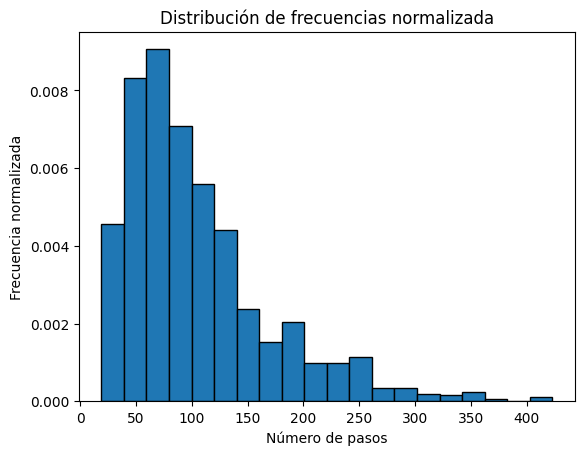

In [204]:
# D
plt.bar(edges[:-1], freq_normal, width=np.diff(edges), edgecolor='k', align='edge')
plt.title("Distribución de frecuencias normalizada")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia normalizada")
plt.show()

In [205]:
# E)
m = (edges[:-1] + edges[1:]) / 2
E = np.sum(freq_normal*m)
print(f'El valor esperado de pasos que le toma al fotón escapar es: {int(E)}')
print(f'Valor no discretizado: {E}')

El valor esperado de pasos que le toma al fotón escapar es: 5
Valor no discretizado: 5.177594059405941


In [206]:
# F)
E_n = (R_s/l)**2
print(f'El valor de E(n) ≈ (Rs/ℓ)^2 es: {E_n}')
print(f'El valor del número medio de pasos es: {promedio_pasos}')
if np.isclose(E_n, promedio_pasos, rtol=1e-1):
  print(f'Se verifica que el número medio de pasos es aproximadamente: E(n) ≈ (Rs/ℓ)^2')

El valor de E(n) ≈ (Rs/ℓ)^2 es: 100.0
El valor del número medio de pasos es: 104.577
Se verifica que el número medio de pasos es aproximadamente: E(n) ≈ (Rs/ℓ)^2


In [207]:
# G) Cálculo Realista:
def Tiempo_de_escape_seg(R=7*10**5, L=0.6, c=3*10**5):
  L *= 10**(-2)
  R *= 10**3
  c *= 10**3
  return (R**2)/(c*L)
# [t]s * (1h / 3600s) * (1d / 24h) * (1a / 365.25d) --> [t] en años
K = (1/3600) * (1/24) * (1/365.25)
print(f'Al foton le toma {Tiempo_de_escape_seg()*K:.2f} años escapar')

Al foton le toma 8626.20 años escapar


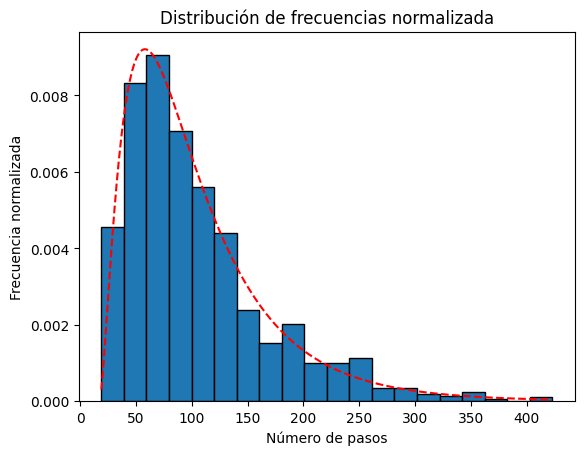

In [208]:
# H)
x = np.linspace(min_pasos, max_pasos, 1000)
a, c, d, e = exponweib.fit(fotones_pasos)
d_prob = exponweib.pdf(x, a, c, d, e)
plt.plot(x, d_prob, color='r', linestyle='--')
plt.bar(edges[:-1], freq_normal, width=np.diff(edges), edgecolor='k', align='edge')
plt.title("Distribución de frecuencias normalizada")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia normalizada")
plt.show()